# Title : COVID-19 Pandamic

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#data loading
df = pd.read_csv('Covid Live.csv')

In [3]:
#view the data
df.head() #default value n=5

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
#remove the '#' 
df.drop('#', axis=1, inplace=True) #directly modify the original data

In [5]:
#Get a list containing all column names
columns = df.columns.tolist()
columns

['Country,\nOther',
 'Total\nCases',
 'Total\nDeaths',
 'New\nDeaths',
 'Total\nRecovered',
 'Active\nCases',
 'Serious,\nCritical',
 'Tot Cases/\n1M pop',
 'Deaths/\n1M pop',
 'Total\nTests',
 'Tests/\n1M pop',
 'Population']

In [6]:
#rename the columns
columns[0] = "Country"
columns[1] = "Total Cases"
columns[2] = "Total Deaths"
columns[3] = "New Deaths"
columns[4] = "Total Recovered"
columns[5] = "Active Cases"
columns[6] = "Serious Cases"
columns[7] = "Total Cases/1M pop"
columns[8] = "Deaths/1M pop"
columns[9] = "Total Tests"
columns[10] = "Test/1M pop"
df.columns = columns
df.head()

,Country,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
0,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [7]:
df.shape

(230, 12)

In [8]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             230 non-null    object 
 1   Total Cases         230 non-null    object 
 2   Total Deaths        225 non-null    object 
 3   New Deaths          3 non-null      float64
 4   Total Recovered     214 non-null    object 
 5   Active Cases        215 non-null    object 
 6   Serious Cases       147 non-null    object 
 7   Total Cases/1M pop  228 non-null    object 
 8   Deaths/1M pop       223 non-null    object 
 9   Total Tests         214 non-null    object 
 10  Test/1M pop         214 non-null    object 
 11  Population          228 non-null    object 
dtypes: float64(1), object(11)
memory usage: 21.7+ KB


In [9]:
#convert the datatype from string into float
df["Total Cases"] = df["Total Cases"].str.replace(",","").astype(float)
df["Total Deaths"] = df["Total Deaths"].str.replace(",","").astype(float)
df["Total Recovered"] = df["Total Recovered"].str.replace(",","").astype(float)
df["Active Cases"] = df["Active Cases"].str.replace(",","").astype(float)
df["Serious Cases"] = df["Serious Cases"].str.replace(",","").astype(float)
df["Total Cases/1M pop"] = df["Total Cases/1M pop"].str.replace(",","").astype(float)
df["Deaths/1M pop"] = df["Deaths/1M pop"].str.replace(",","").astype(float)
df["Total Tests"] = df["Total Tests"].str.replace(",","").astype(float)
df["Test/1M pop"] = df["Test/1M pop"].str.replace(",","").astype(float)
df["Population"] = df["Population"].str.replace(",","").astype(float)

In [10]:
#Count the number of missing values
df.isnull().sum()

Country                 0
Total Cases             0
Total Deaths            5
New Deaths            227
Total Recovered        16
Active Cases           15
Serious Cases          83
Total Cases/1M pop      2
Deaths/1M pop           7
Total Tests            16
Test/1M pop            16
Population              2
dtype: int64

In [11]:
#checking for null values in percentage
df.isnull().sum() * 100 / len(df)

Country                0.000000
Total Cases            0.000000
Total Deaths           2.173913
New Deaths            98.695652
Total Recovered        6.956522
Active Cases           6.521739
Serious Cases         36.086957
Total Cases/1M pop     0.869565
Deaths/1M pop          3.043478
Total Tests            6.956522
Test/1M pop            6.956522
Population             0.869565
dtype: float64

<Axes: >

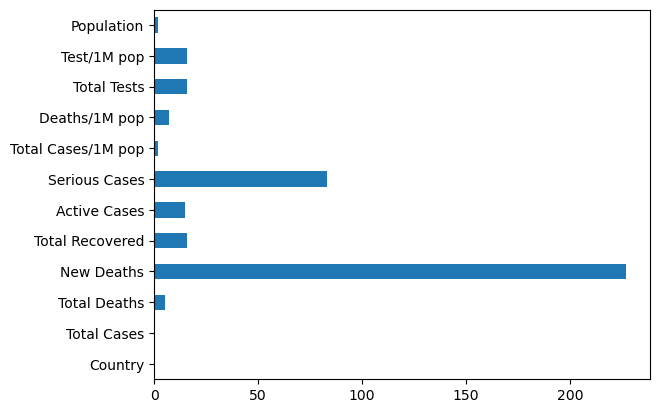

In [12]:
#create a bar chart
df.isnull().sum().plot(kind = 'barh')

In [13]:
#Because most of the New Death is empty, it is filled with 0
df['New Deaths'] = df['New Deaths'].fillna(0)

In [14]:
#import SimpleImputer  for imputing (filling in) missing values with either constant values or statistical measures. 
from sklearn.impute import SimpleImputer

In [15]:
#imputer Initialization
imputer = SimpleImputer(missing_values=np.nan, strategy="median",fill_value=None)

#Imputeration on each column
df["Total Deaths"] = imputer.fit_transform(df[["Total Deaths"]])
df["Total Recovered"] = imputer.fit_transform(df[["Total Recovered"]])
df["Active Cases"] = imputer.fit_transform(df[["Active Cases"]])
df["Serious Cases"] = imputer.fit_transform(df[["Serious Cases"]])
df["Deaths/1M pop"] = imputer.fit_transform(df[["Deaths/1M pop"]])
df["Total Tests"] = imputer.fit_transform(df[["Total Tests"]])
df["Total Cases/1M pop"] = imputer.fit_transform(df[["Total Cases/1M pop"]])
df["Test/1M pop"] = imputer.fit_transform(df[["Test/1M pop"]])
df["Population"] = imputer.fit_transform(df[["Population"]])

#can use for loop 
# columns_to_impute = ["Total Deaths", "Total Recovered", "Active Cases", "Serious Cases",
#     "Deaths/1M pop", "Total Tests", "Total Cases/1M pop", "Test/1M pop", "Population"]

# imputer = SimpleImputer(missing_values=np.nan, strategy="median",fill_value=None)

# for col in columns_to_impute:
#     df[col] = imputer.fit_transform(df[[col]]).ravel()

In [16]:
#check the null values
df.isnull().sum()

Country               0
Total Cases           0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious Cases         0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Test/1M pop           0
Population            0
dtype: int64

In [17]:
#check the duplicated value
df.duplicated().sum()

np.int64(0)

In [18]:
#descriptive statistics
df.describe()

,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.851300e+04,0.234783,2.627620e+06,5.378354e+04,179.204348,179085.795652,1185.156522,2.933894e+07,1.968860e+06,3.459377e+07
std,8.779899e+06,1.011682e+05,2.835614,8.527212e+06,2.009570e+05,746.681337,181664.951320,1229.921910,1.106360e+08,3.379768e+06,1.383417e+08
min,9.000000e+00,1.000000e+00,0.000000,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.160000e+02,0.000000,2.449950e+04,1.700000e+02,10.000000,17017.500000,174.250000,4.007550e+05,1.968250e+05,5.476582e+05
50%,2.037110e+05,2.179000e+03,0.000000,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,1.256286e+06,1.327200e+04,0.000000,1.214962e+06,1.827425e+04,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [31]:
#check the correlation
#drop the 'Country' column
df_corr = df.drop(columns='Country')

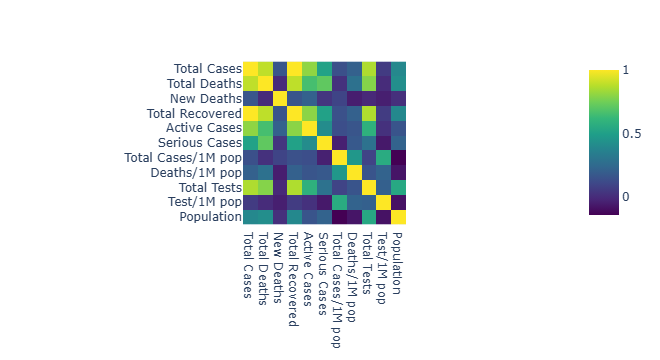

In [32]:
corr_matrix = df_corr.corr()

fig = px.imshow(corr_matrix)
fig = px.imshow(corr_matrix, color_continuous_scale='Viridis')
fig.show()

In [21]:
#EDA
df.head()

,Country,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Test/1M pop,Population
0,USA,98166904.0,1084282.0,0.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,India,44587307.0,528629.0,0.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,France,35342950.0,155078.0,0.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,Brazil,34706757.0,686027.0,0.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,Germany,33312373.0,149948.0,0.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


# Total Cases VS Total Recovered

In [22]:
fig = px.scatter(df, x='Total Cases', y='Total Recovered', title="Total Cases vs Total Recovered", color_continuous_scale='Viridis', color='Total Recovered')
fig.show()

# Total Cases VS Total Deaths

In [23]:
fig = px.scatter(df, x='Total Cases', y='Total Deaths', title="Total Cases vs Total Deaths", color_continuous_scale='Viridis', color='Total Deaths')
fig.show()

# Total Cases VS Active Cases

In [24]:
fig = px.scatter(df, x='Total Cases', y='Active Cases', title="Total Cases vs Active Cases", color_continuous_scale='Viridis', color='Active Cases')
fig.show()

# Active Cases VS Serious One

In [25]:
df.groupby('Active Cases')['Serious Cases'].sum()

Active Cases
0.0           144.0
3.0            28.0
4.0            18.0
5.0            40.0
10.0            1.0
              ...  
804449.0      204.0
836193.0     3086.0
843821.0      106.0
847225.0     1406.0
2120510.0    2970.0
Name: Serious Cases, Length: 196, dtype: float64

In [26]:
fig = px.scatter(df, x='Active Cases', y='Serious Cases', title="Active Cases vs Serious Cases", color_continuous_scale='Viridis', color='Serious Cases')
fig.show()

# Country Population and Total Cases

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Total Cases'],
    text=df['Population'],
    colorscale='Viridis',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Total Cases'
))

fig.update_layout(
    title_text='Total Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'              
    )
)

fig.show()

# Country Population and Serious Cases

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Serious Cases'],
    text=df['Population'],
    colorscale='Spectral',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Serious Cases'
))

fig.update_layout(
    title_text='Serious Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'              
    )
)

fig.show()

# Country Population and Active Cases

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    locationmode='country names',
    z=df['Active Cases'],
    text=df['Population'],
    colorscale='spectral',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title='Active Cases'
))

fig.update_layout(
    title_text='Active Cases and Population by Country',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'              
    )
)

fig.show()

# Population VS TEST

In [30]:
fig = px.scatter(df, x='Population', y='Total Tests', title="Total Population vs Total Tests", color_continuous_scale='Viridis', color='Total Tests')
fig.show()